# 1. Resampling and Penalized Model

- Analyze data bankloan.csv
    - Build a logistic regression model
        - Target: default
        - Features: Employ, debtinc, creddebt, othdebt
    - Explore the class disribution
    - Random State 2020, stratified training 60%, validation 20, testing 20
    - Modeling evaluate by f1 score:
        - Logistic regression without any treatment
        - Logistic regression that optimized by the threshold
        - Logistic regression with random undersampling
        - Penalized logistic regression

In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\bankloan.csv')
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [4]:
df['default'].value_counts()

0    517
1    183
Name: default, dtype: int64

In [5]:
df['default'].value_counts()/df.shape[0]

0    0.738571
1    0.261429
Name: default, dtype: float64

## 1.1 Data Splitting

60 TRAIN, 20 VALIDATION, 20 TEST

In [8]:
x = df[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = df['default']

In [9]:
# UNTUK TEST SET
x_trainval, x_test, y_trainval, y_test = train_test_split(
    x,
    y,
    random_state = 2020,
    stratify = y,
    test_size = 0.2
)

In [10]:
# UNTUK VALIDATION SET
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval,
    y_trainval,
    random_state = 2020,
    stratify = y_trainval,
    test_size = 0.2
)

KITA BANDINGKAN KE 4 DIBAWAH INI MANA YG TERBAIK

- Logistic regression without any treatment
- Logistic regression that optimized by the threshold
- Logistic regression with random undersampling
- Penalized logistic regression

## 1.2 Logistic

In [11]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred)) # THRESHOLD 0.5

              precision    recall  f1-score   support

           0       0.84      0.92      0.87        83
           1       0.67      0.48      0.56        29

    accuracy                           0.80       112
   macro avg       0.75      0.70      0.72       112
weighted avg       0.79      0.80      0.79       112



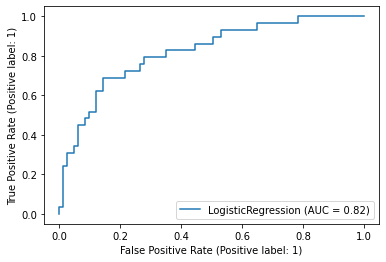

In [13]:
plot_roc_curve(model, x_val, y_val)

## 1.3 Logistic Optimized threshold

In [18]:
th_value = [i/100 for i in range(20, 61)]
score = 0
score_list = []

for i in th_value:
    #perhitungan score
    y_prob = model.predict_proba(x_val)[:,1]
    y_pred = np.where(y_prob > i, 1, 0)
    score_temp = f1_score(y_val, y_pred)

    #penyimpanan hasil score
    score_list.append(score_temp)

    #comparasi:penentuan score terbaik
    if score_temp > score:
        score = score_temp
        best_th = i

In [21]:
print('Bet F1_Score', score)
print('Best Threshold', best_th)

Bet F1_Score 0.6451612903225807
Best Threshold 0.37


Text(0, 0.5, 'Score')

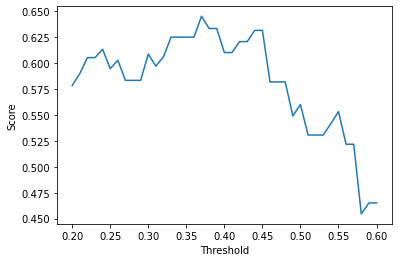

In [22]:
sns.lineplot(th_value, score_list)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')

## 1.4 Logistic with Random Undersampling (RUS)

In [23]:
rus = RandomUnderSampler()
x_under, y_under = rus.fit_resample(x_train, y_train)

In [25]:
len(y_under)

234

In [26]:
len(y_train)

448

In [27]:
model_rus = LogisticRegression()
model_rus.fit(x_under, y_under)

LogisticRegression()

In [28]:
y_pred = model_rus.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        83
           1       0.50      0.76      0.60        29

    accuracy                           0.74       112
   macro avg       0.70      0.75      0.71       112
weighted avg       0.79      0.74      0.75       112



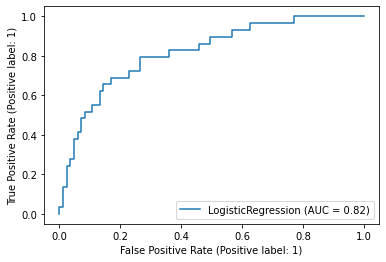

In [29]:
plot_roc_curve(model_rus, x_val, y_val)

## 1.5 Penalized Logistic Regression

In [30]:
model_blanced = LogisticRegression(class_weight = 'balanced')
model_blanced.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [31]:
y_pred = model_blanced.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        83
           1       0.49      0.76      0.59        29

    accuracy                           0.73       112
   macro avg       0.69      0.74      0.70       112
weighted avg       0.79      0.73      0.75       112



## 1.6 Performa Final Model: Logistic Optimized Threshold

In [32]:
model = LogisticRegression()
model.fit(x_trainval, y_trainval)

LogisticRegression()

In [34]:
y_prob = model.predict_proba(x_test)[:,1]
y_pred = np.where(y_prob > best_th, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       103
           1       0.56      0.62      0.59        37

    accuracy                           0.77       140
   macro avg       0.71      0.72      0.72       140
weighted avg       0.78      0.77      0.78       140



- Pada akhirnya model logistic optimized threshold memiliki f1 score lebih baik dari yang lainnya
- sehingga dipiih untuk menjadi final model
- akan tetapi f1 score berbeda pada uji coba dengan final model

# 2. Evaluation Method

Analyze data bankloan.csv
- Built a logistic regrerssion model
    - target: default
    - features: employ , debtinc, creddebt, othdebt
- Random state 2020, ratio 80 20
- modeling evaluate by f1 score and using stratified 5 fold cv
    - penalized logistic regression
    - logistic regression with smote
- which method is better


In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\bankloan.csv')
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [7]:
x = df[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = df['default']

## 2.1 Data Splitting

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 2020
)

## 2.2 Penalized Logistic Regression

In [9]:
model = LogisticRegression(class_weight = 'balanced')
skf = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(model, x_train, y_train, cv = skf, scoring = 'f1')

In [16]:
print(model_cv)
print(model_cv.mean())
print(model_cv.std())

[0.63888889 0.58823529 0.61728395 0.58064516 0.60526316]
0.6060632905617759
0.020822978090423456


## 2.3 Logistic Regression with SMOTE

In [13]:
smote = SMOTE()
model = LogisticRegression()

pipe_model = Pipeline([
    ('balance', smote),
    ('clf', model),
])

skf = StratifiedKFold(n_splits = 5) 

In [17]:
model_smote_cv = cross_val_score(pipe_model, x_train, y_train, cv = skf, scoring = 'f1')

In [19]:
print(model_smote_cv)
print(model_smote_cv.mean())
print(model_smote_cv.std())


[0.64       0.55882353 0.6097561  0.59016393 0.60526316]
0.6008013438587414
0.0265025335650002


## 2.4 Final Model Perfomance

In [20]:
model = LogisticRegression(class_weight = 'balanced')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [22]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       103
           1       0.48      0.84      0.61        37

    accuracy                           0.72       140
   macro avg       0.70      0.76      0.70       140
weighted avg       0.81      0.72      0.74       140



## 2.5 Hyperparameter Tuning

Analyze data bankloan.csv
- Built a logistic regrerssion model
    - target: default
    - features: employ , debtinc, creddebt, othdebt
- Random state 2020, ratio 80 20
- modeling evaluate by f1 score and using stratified 5 fold cv
- Logistic regression with SMOTE optimize the k neigbor optimize c, solver
- Compare the result (before and after)

In [27]:
from sklearn.model_selection import GridSearchCV

In [34]:
# model
smote = SMOTE()
model = LogisticRegression()

pipe_model = Pipeline([
    ('balance', smote),
    ('clf', model),
])

# metode eval
skf = StratifiedKFold(n_splits = 5)  

# hyperparameter
prams = {
    'balance__k_neighbors' : [2,5,10,15,20],
    'clf__C' : [100,10,1,0.1, 0.001],
    'clf__solver' : ['lbfgs', 'libliear', 'newton-cg']
}

grid_search  = GridSearchCV(
    pipe_model,
    param_grid = prams,
    cv = skf,
    scoring = 'f1',
    n_jobs = -1
)

In [35]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balance', SMOTE()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balance__k_neighbors': [2, 5, 10, 15, 20],
                         'clf__C': [100, 10, 1, 0.1, 0.001],
                         'clf__solver': ['lbfgs', 'libliear', 'newton-cg']},
             scoring='f1')

In [36]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.6210104568990915
{'balance__k_neighbors': 2, 'clf__C': 0.1, 'clf__solver': 'lbfgs'}


In [37]:
hasil_tuning = pd.DataFrame(grid_search.cv_results_)
hasil_tuning

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balance__k_neighbors,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028324,0.002570,0.006782,0.006096,2,100,lbfgs,"{'balance__k_neighbors': 2, 'clf__C': 100, 'cl...",0.638889,0.567164,0.617284,0.612903,0.613333,0.609915,0.023418,15
1,0.011768,0.003591,0.000000,0.000000,2,100,libliear,"{'balance__k_neighbors': 2, 'clf__C': 100, 'cl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
2,0.027526,0.004575,0.003991,0.000631,2,100,newton-cg,"{'balance__k_neighbors': 2, 'clf__C': 100, 'cl...",0.638889,0.588235,0.617284,0.612903,0.597403,0.610943,0.017459,9
3,0.025129,0.004342,0.004189,0.000977,2,10,lbfgs,"{'balance__k_neighbors': 2, 'clf__C': 10, 'clf...",0.638889,0.588235,0.625000,0.584615,0.605263,0.608401,0.020916,21
4,0.009774,0.002130,0.000000,0.000000,2,10,libliear,"{'balance__k_neighbors': 2, 'clf__C': 10, 'clf...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.010605,0.002856,0.000000,0.000000,20,0.1,libliear,"{'balance__k_neighbors': 20, 'clf__C': 0.1, 'c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
71,0.022341,0.002646,0.004512,0.000713,20,0.1,newton-cg,"{'balance__k_neighbors': 20, 'clf__C': 0.1, 'c...",0.638889,0.515152,0.617284,0.612903,0.605263,0.597898,0.042854,40
72,0.020205,0.004508,0.006745,0.003202,20,0.001,lbfgs,"{'balance__k_neighbors': 20, 'clf__C': 0.001, ...",0.676056,0.540541,0.600000,0.557377,0.613333,0.597461,0.047502,41
73,0.009652,0.002874,0.000000,0.000000,20,0.001,libliear,"{'balance__k_neighbors': 20, 'clf__C': 0.001, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,71


In [38]:
hasil_tuning[hasil_tuning['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balance__k_neighbors,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.02254,0.006326,0.005186,0.002394,2,0.1,lbfgs,"{'balance__k_neighbors': 2, 'clf__C': 0.1, 'cl...",0.638889,0.608696,0.617284,0.634921,0.605263,0.62101,0.013614,1


In [40]:
hasil_tuning[(hasil_tuning['param_balance__k_neighbors'] == 10) & (hasil_tuning['param_clf__C'] == 1) & (hasil_tuning['param_clf__solver'] == 'lbfgs')]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balance__k_neighbors,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.034908,0.013935,0.004587,0.001739,10,1,lbfgs,"{'balance__k_neighbors': 10, 'clf__C': 1, 'clf...",0.64,0.567164,0.623377,0.612903,0.605263,0.609741,0.024267,16


## 2.6 Comparison before and after

### 2.6.1 Before

In [41]:
smote = SMOTE()
model = LogisticRegression()

pipe_model = Pipeline([
    ('balance', smote),
    ('clf', model),
])

In [43]:
pipe_model.fit(x_train, y_train)
y_pred = pipe_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       103
           1       0.52      0.84      0.64        37

    accuracy                           0.75       140
   macro avg       0.72      0.78      0.72       140
weighted avg       0.82      0.75      0.76       140



### 2.6.2 After

In [44]:
pipe_model = grid_search.best_estimator_

In [45]:
pipe_model.fit(x_train, y_train)
y_pred = pipe_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       103
           1       0.48      0.76      0.59        37

    accuracy                           0.72       140
   macro avg       0.69      0.73      0.69       140
weighted avg       0.78      0.72      0.74       140

